In [1]:
import pandas as pd

raw_data = pd.read_csv("plt_data.csv")

group_data = raw_data.groupby("group")
group_low = group_data.get_group("low")
group_high = group_data.get_group("high")

group_low

,group,bloodType,net_weight_b,net_weight_a,plt_b,plt_a,count_b,count_a,recovery
0,low,A+,125,80,297,408,37125,32640,0.879192
1,low,AB+,135,80,534,761,72090,60880,0.844500
2,low,O+,110,55,957,1307,105270,71885,0.682863
3,low,AB+,155,55,981,2130,152055,117150,0.770445
4,low,O+,145,65,600,1233,87000,80145,0.921207
5,low,A+,123,93,745,967,91635,89931,0.981404
6,low,A+,113,78,1241,1456,140233,113568,0.809852
7,low,B+,168,113,1091,1487,183288,168031,0.916759
8,low,O+,243,73,1181,2904,286983,211992,0.738692
9,low,A+,125,55,928,1869,116000,102795,0.886164


In [2]:
group_high


,group,bloodType,net_weight_b,net_weight_a,plt_b,plt_a,count_b,count_a,recovery
12,high,O+,120,70,537,813,64440,56910,0.883147
13,high,B+,135,85,956,1298,129060,110330,0.854874
14,high,O+,135,60,964,1544,130140,92640,0.711849
15,high,A+,93,78,1149,988,106857,77064,0.721188
16,high,A+,108,58,1155,1927,124740,111766,0.895992
17,high,O+,98,73,1147,1476,112406,107748,0.958561
18,high,A+,150,55,1260,2740,189000,150700,0.797354
19,high,B+,125,70,947,1167,118375,81690,0.690095


In [3]:
from scipy import stats

def compare_t(col):
    r = stats.ttest_ind(group_low[col],group_high[col], equal_var=True)
    print(col,r)

for c in ["net_weight_b","net_weight_a","plt_b","plt_a","count_b","count_a"]:
    compare_t(c)


net_weight_b Ttest_indResult(statistic=1.65588409217018, pvalue=0.11507438419262567)
net_weight_a Ttest_indResult(statistic=0.7857298684287987, pvalue=0.44224666248435085)
plt_b Ttest_indResult(statistic=-1.4507736197220966, pvalue=0.16404710732370512)
plt_a Ttest_indResult(statistic=-0.2232344230713921, pvalue=0.8258668582229931)
count_b Ttest_indResult(statistic=0.09301205892624159, pvalue=0.9269214277344457)
count_a Ttest_indResult(statistic=0.22065206456245753, pvalue=0.8278468001988786)


In [4]:
low_rec = group_low['recovery']
high_rec = group_high['recovery']

# T test
stats.ttest_ind(low_rec, high_rec, equal_var=True)

Ttest_indResult(statistic=0.6964032996284172, pvalue=0.4950717288162305)

In [5]:
# whilch t test
stats.ttest_ind(low_rec, high_rec, equal_var=False)

Ttest_indResult(statistic=0.6776193714373996, pvalue=0.5092664128257969)

In [6]:
# whilch t test
t, p=stats.ttest_ind(low_rec, high_rec, equal_var=False)

In [7]:
# mannwhitney U test
stats.mannwhitneyu(low_rec, high_rec)

MannwhitneyuResult(statistic=39.0, pvalue=0.25597987113236476)

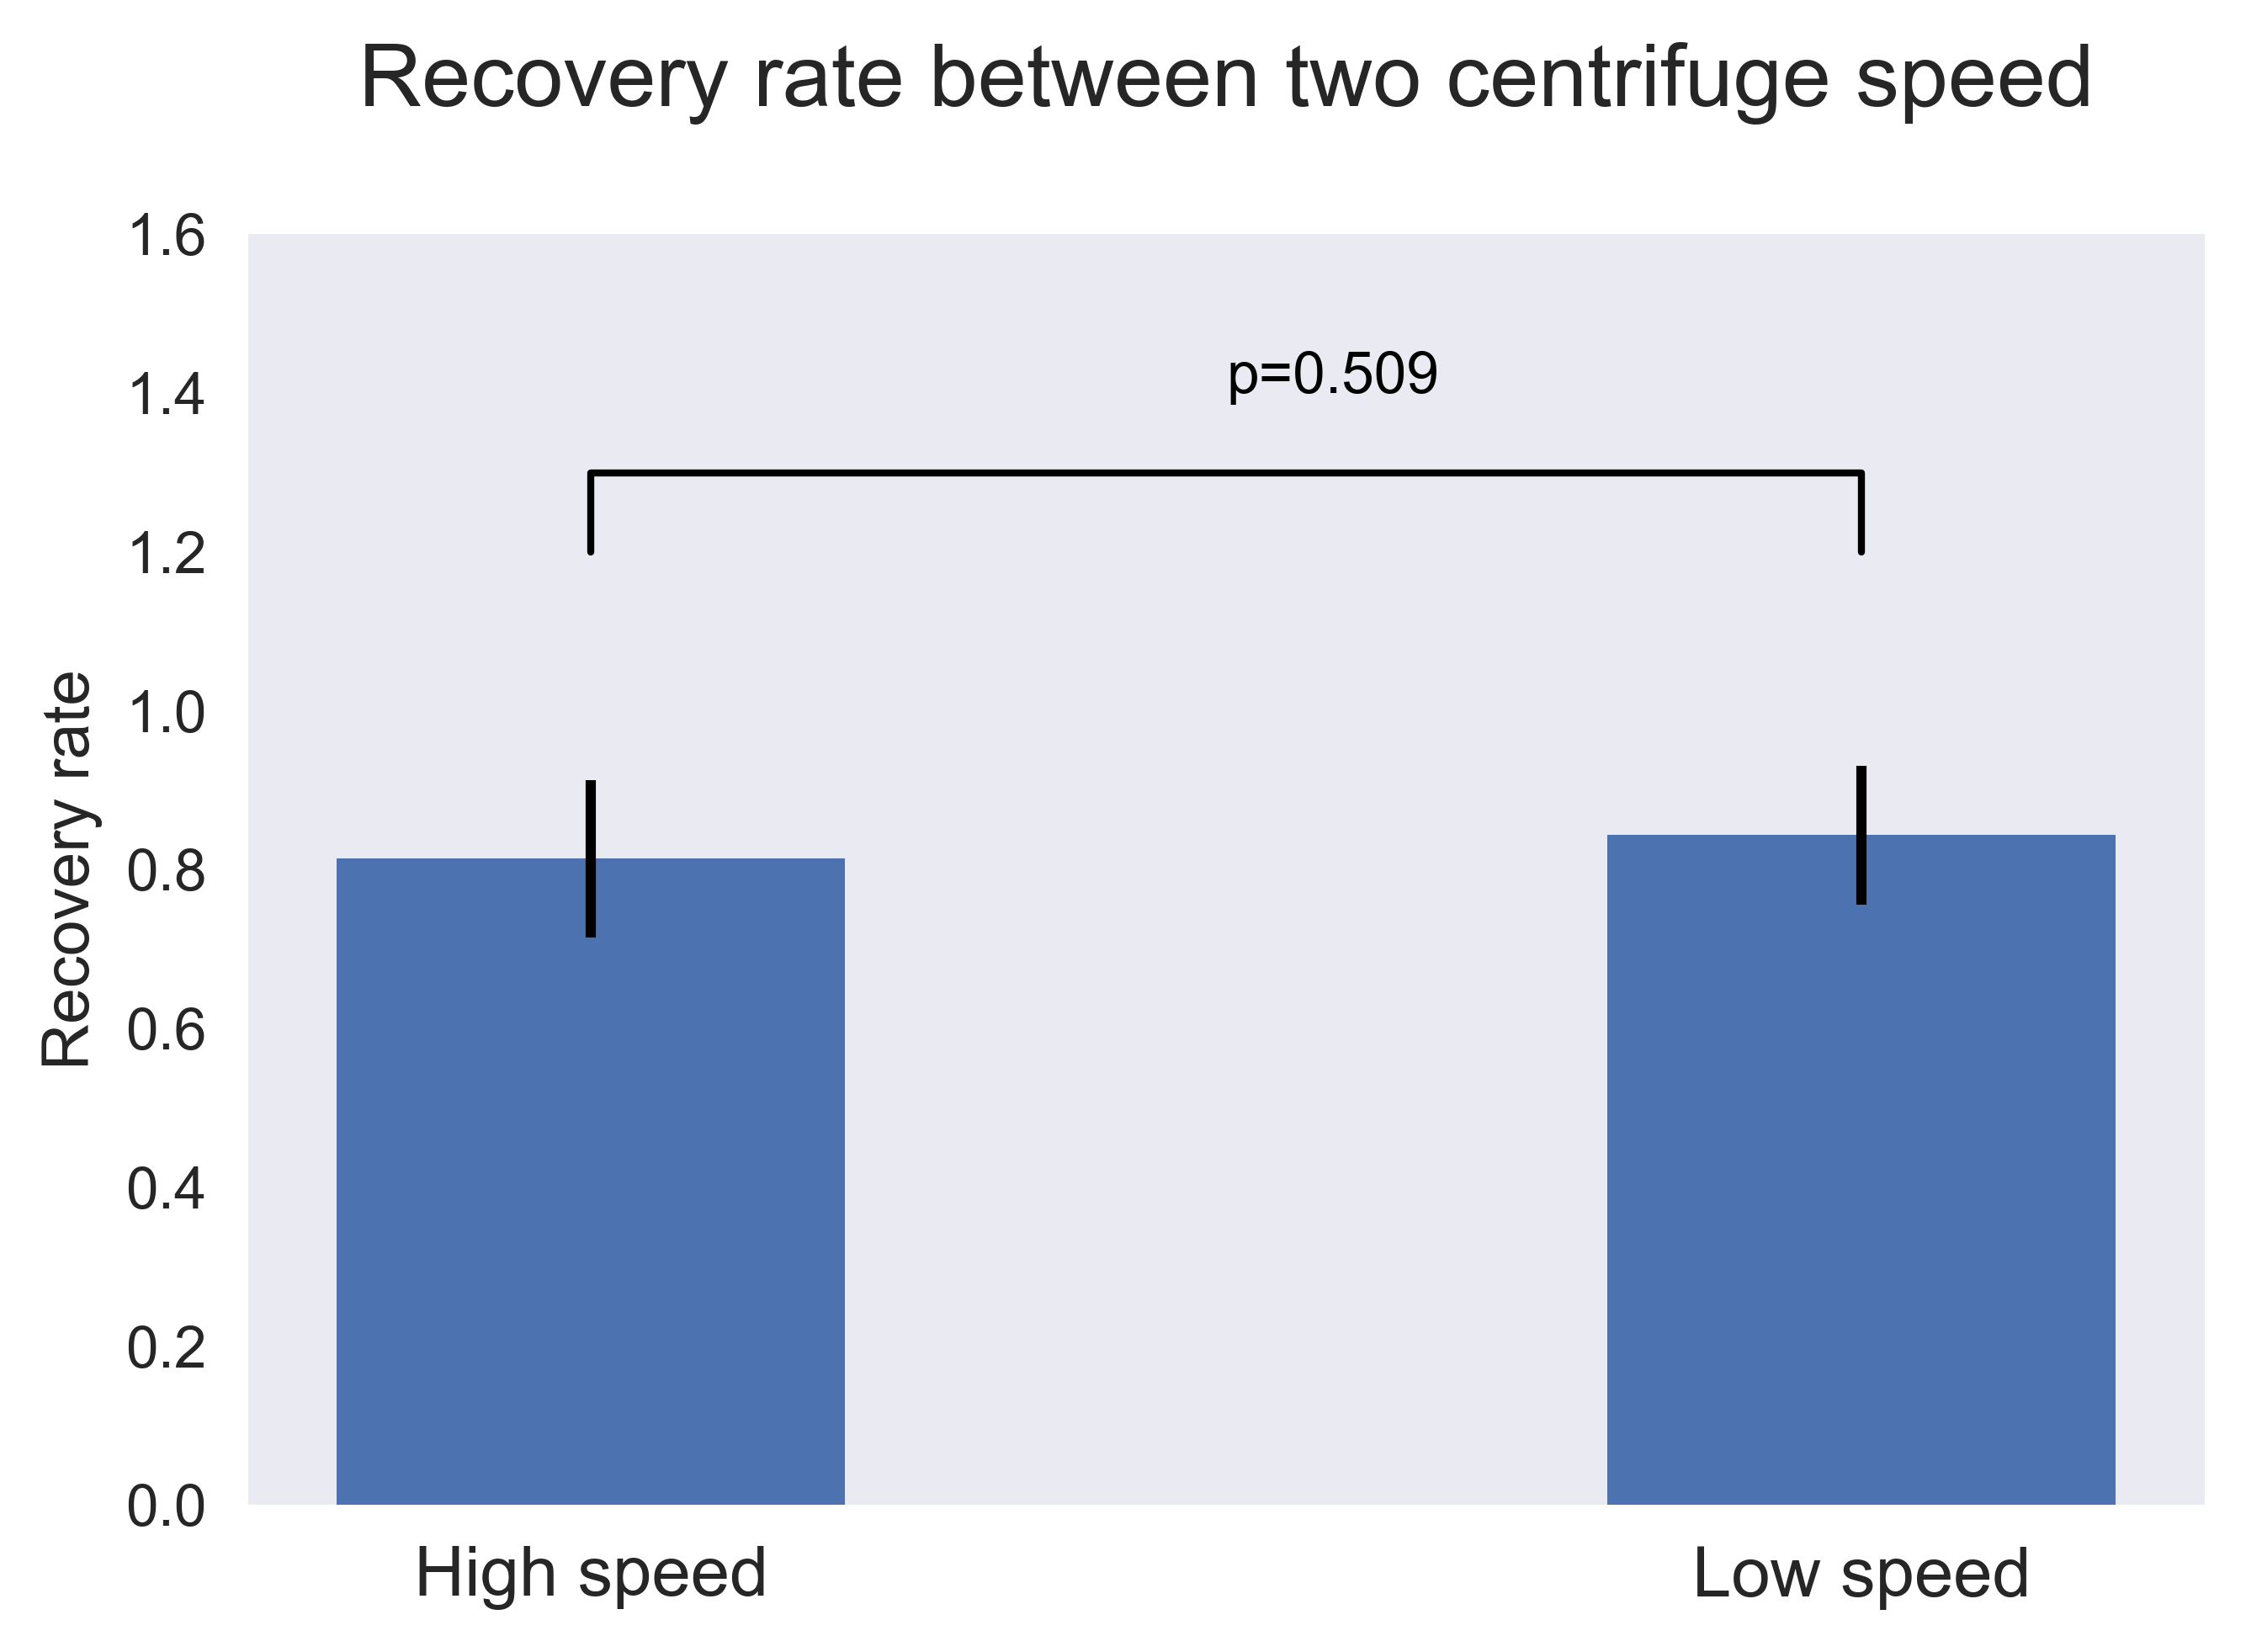

In [10]:
import matplotlib.pyplot as plt

plt.ioff()
plt.figure(figsize=(6, 4), dpi=500) 
# plt.style.use("grayscale")
plt.style.use("seaborn")

mean = group_data.mean()['recovery'].rename("mean")
std = group_data.std()['recovery'].rename("std")

recovery = pd.DataFrame([mean, std])

plt.bar(mean.index, mean, yerr = std, width = 0.4, align="center")
plt.title("Recovery rate between two centrifuge speed\n", size = 15)
plt.ylabel("Recovery rate")
plt.ylim((0,1.6))
plt.xticks((0,1),("High speed","Low speed"), size = 12)
plt.grid(which="major")

# p value
plt.plot((0,0,1,1),[1.2,1.3,1.3,1.2], lw=1.2, color = 'k' )
plt.text(1*.5, 1.4, f"p={p:.3}",color ="k")

plt.show()


In [9]:
plt.style.available

['seaborn',
 'seaborn-deep',
 'seaborn-ticks',
 'seaborn-bright',
 'fivethirtyeight',
 'seaborn-notebook',
 'seaborn-poster',
 'Solarize_Light2',
 'dark_background',
 '_classic_test',
 'classic',
 'grayscale',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-muted',
 'seaborn-colorblind',
 'seaborn-white',
 'fast',
 'seaborn-whitegrid',
 'tableau-colorblind10',
 'seaborn-dark-palette',
 'seaborn-talk',
 'seaborn-paper',
 'bmh',
 'ggplot',
 'seaborn-pastel']